In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
df = pd.read_csv('upload_best_geom_results.txt', header=0, sep="\t")
df.columns = ['Id', 'Embeddings', 'Projections', 'Lambda_c', 'Negative Count', 'Metric', 'Algorithm', 'Metric Algorithm', 'Score']

In [58]:
df.head()

,Id,Embeddings,Projections,Lambda_c,Negative Count,Metric,Algorithm,Metric Algorithm,Score
0,1,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.52950
1,2,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.54185
2,3,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.53833
3,4,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.54496
4,5,ft,5,0.18,5,MRR,Yamane,MRR-Yamane,0.51091


In [51]:
#df_mrr = df.loc[(df.Metric=='MRR'), :]
#df_map = df.loc[(df.Metric=='MAP'), :]

<Figure size 864x576 with 0 Axes>

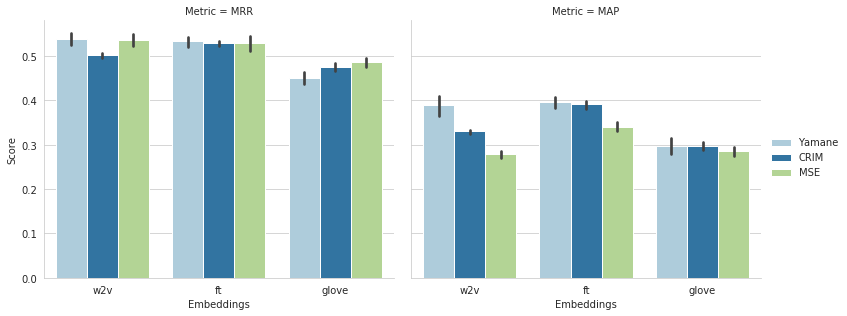

In [78]:
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")

g = sns.FacetGrid(df, col="Metric", height=4.5, aspect=1.2, legend_out=True)
g = (g.map(sns.barplot, "Embeddings", "Score", "Algorithm", palette=pal, order=['w2v','ft','glove']).add_legend())


In [127]:
# compare CRIM results in terms of projections and negative count

crim_grid = pd.read_csv('upload_crim_grid.txt', header=0, sep="\t")
crim_grid.columns = ['Id', 'Method', 'Embeddings', 'Projections', 'Lambda', 'Negative Count', 'Metric', 'Fold1', 'Fold2', 'Fold3', 'Fold4', 'Fold5']

In [129]:
crim_grid.head()

,Embeddings,Projections,Negative Count,variable,MAP Score
0,ft,1,1,Fold1,0.35661
1,ft,1,5,Fold1,0.36177
2,ft,1,10,Fold1,0.36001
3,ft,5,1,Fold1,0.37038
4,ft,5,5,Fold1,0.37493


In [128]:
crim_grid = pd.melt(crim_grid.reset_index(), id_vars=['Embeddings','Projections','Negative Count'], value_vars=['Fold1','Fold2','Fold3','Fold4','Fold5'])
crim_grid.rename(columns={'value':'MAP Score'}, inplace=True)


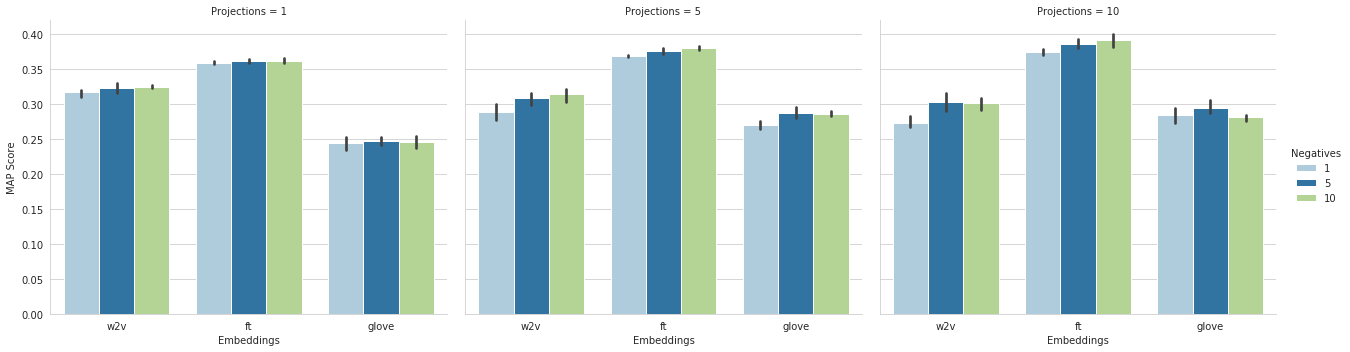

In [130]:
sns.set_style("whitegrid")
pal = sns.color_palette("Paired")

g = sns.FacetGrid(crim_grid, col="Projections", height=5, aspect=1.2, legend_out=True)
g = (g.map(sns.barplot, "Embeddings", "MAP Score", "Negative Count", palette=pal, order=['w2v','ft','glove']).add_legend(title="Negatives"))

In [143]:
crim_training = pd.read_csv('upload_training_stats.txt', header=0, sep="\t")
crim_training.columns = ['Id', 'Embeddings', 'Lambda_c', 'Epoch', 'Clusters','Loss', 'MAP', 'MRR' ]

In [147]:
crim_training#.head()

,Embeddings,Epoch,Score Type,Score
0,glove,1,Clusters,2.00000
1,glove,2,Clusters,3.00000
2,glove,3,Clusters,4.00000
3,glove,4,Clusters,5.00000
4,glove,5,Clusters,6.00000
5,glove,6,Clusters,7.00000
6,glove,7,Clusters,8.00000
7,w2v,1,Clusters,2.00000
8,w2v,2,Clusters,3.00000
9,w2v,3,Clusters,4.00000


In [146]:
crim_training = pd.melt(crim_training.reset_index(), id_vars=['Embeddings','Epoch'], value_vars=['Clusters','Loss','MAP','MRR'])
crim_training.rename(columns={'value':'Score','variable':'Score Type'}, inplace=True)

In [157]:
crim_training_m = crim_training[crim_training['Score Type'].isin(['MRR','MAP'])]
crim_training_c = crim_training[crim_training['Score Type'].isin(['Clusters'])]

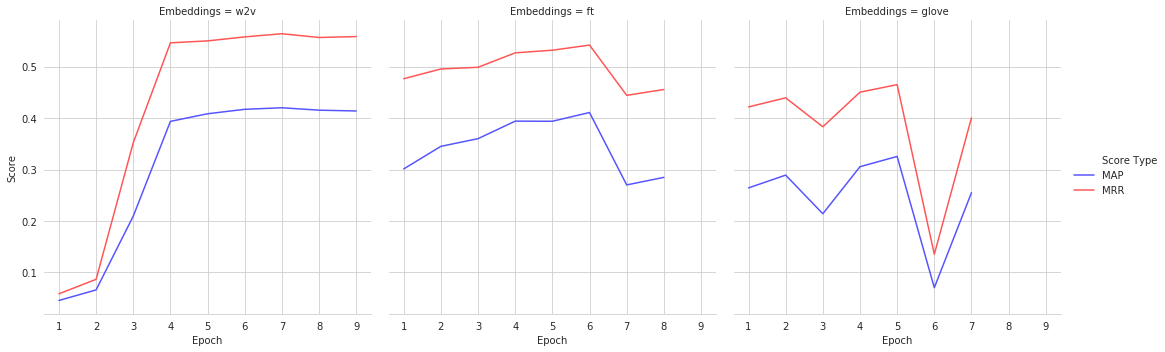

In [162]:
pal = sns.color_palette("seismic", n_colors=2)
g = sns.relplot(x="Epoch", y="Score", hue="Score Type", col="Embeddings", 
                col_order = ['w2v', 'ft', 'glove'], kind="line", 
                legend='full', data=crim_training_m, palette=pal)
g.despine(left=True)

# Scratch Pad

In [ ]:
#g = sns.barplot(x="Embeddings", y="Score", hue="Algorithm", data=df_mrr, palette=pal, 
            order = ['w2v','ft','glove'])
            #hue_order=["MRR-CRIM", "MRR-Yamane", "MAP-CRIM", "MAP-Yamane"])
g.set(ylabel='MRR 5-fold Mean Score')